In [2]:
import zipfile
import os

zip_path = "children_and_adults.zip"
extract_path = "children_and_adults"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", os.path.abspath(extract_path))

Extracted to: d:\BINUS SEMESTER 5\DL_Projects\DeepLearningAIModel\children_and_adults


In [3]:
pip install pyyaml

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


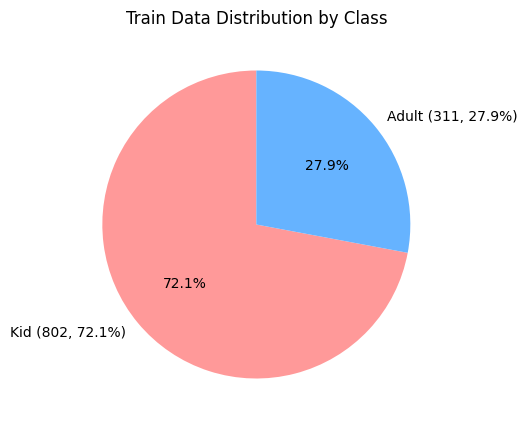

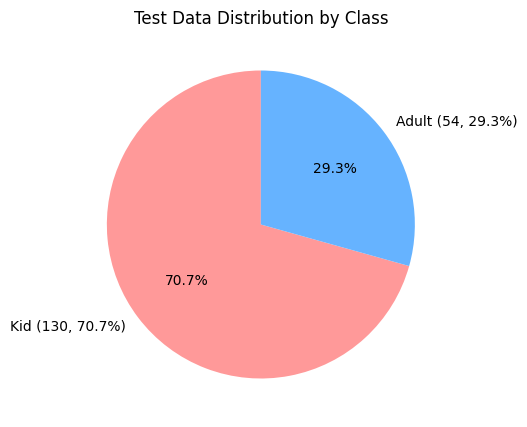

In [4]:
import os
import os
import random
import cv2
import matplotlib.pyplot as plt
import yaml

class data_visualization:
    def __init__(self,main_data_path,dataset_path,data1_yaml):
        self.dataset_path=dataset_path
        self.data1_yaml=data1_yaml
        self.main_data_path=main_data_path
        self.train_labels=None
        self.test_labels=None
        self.unique_labels=None
        self.unique_name=None


        self.get_labels_count()
        self.data_distribution()

    def get_labels_count(self):
        self.train_labels =[]
        self.test_labels=[]

        for folder_name in os.listdir(self.dataset_path):

            if folder_name.endswith('.cache'):
                pass
            else:
                folder_path = os.path.join(dataset_path,folder_name)

                # Loop through all .txt files in the dataset folder
                for file_name in os.listdir(folder_path):
                    if file_name.endswith('.txt'):
                        file_path = os.path.join(folder_path, file_name)
                        with open(file_path, 'r') as file:
                            for line in file:
                                # Extract the class label (first number in the line)
                                class_label = line.split()[0]
                                if folder_name=="train":
                                    self.train_labels.append(class_label)
                                else:
                                    self.test_labels.append(class_label)


        self.unique_labels=list(set(self.train_labels))
        return self.train_labels,self.test_labels


    def pie_chart(self,label_counts,class_labels,cate):
        colors = ['#ff9999', '#66b3ff', '#99ff99']  # Adjust colors as needed

        # Calculate percentages for the labels
        total = sum(label_counts)
        percentages = [count / total * 100 for count in label_counts]

        # Create a pie chart
        plt.figure(figsize=(5, 5))
        plt.pie(
            label_counts,
            labels=[
                f"{label} ({count}, {percentage:.1f}%)"
                for label, count, percentage in zip(class_labels, label_counts, percentages)
            ],
            colors=colors,
            autopct='%1.1f%%',
            startangle=90
        )

        plt.title(f'{cate} Data Distribution by Class')
        plt.show()
        print("\n")


    def data_distribution(self):
        with open(self.data1_yaml, 'r') as file:
            data = yaml.safe_load(file)

        classes=data["names"]
        self.unique_name=list(classes.values())


        # Example dataset
        class_labels = []  # Replace with your actual labels
        train_label_counts = []  # Replace with counts of each label in your dataset
        test_label_counts=[]


        for class_label_key in classes.keys():
            class_labels.append(classes[class_label_key])
            if self.train_labels is not None:
                train_label_counts.append(self.train_labels.count(str(class_label_key)))

            if self.test_labels is not None:
                test_label_counts.append(self.test_labels.count(str(class_label_key)))

        if train_label_counts is not None:
            self.pie_chart(train_label_counts,class_labels,"Train")

        if test_label_counts is not None:
            self.pie_chart(test_label_counts,class_labels,"Test")


    def plot_random_samples(self,split,num_samples=6):
        class_names=self.unique_name

        # Get image paths for the specified split
        images_dir = os.path.join(self.main_data_path, 'images', split)
        image_paths = [
            os.path.join(images_dir, file_name)
            for file_name in os.listdir(images_dir)
            if file_name.endswith('.jpg') or file_name.endswith('.png')
        ]

        # Randomly sample images
        random_samples = random.sample(image_paths, num_samples)

        # Create a 3x2 grid to display the images
        fig, axes = plt.subplots(2, 3, figsize=(12, 8))
        axes = axes.ravel()  # Flatten axes for easy iteration

        for idx, img_path in enumerate(random_samples):
            # Load the image
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

            # Get corresponding annotation file path in the labels folder
            annotation_path = img_path.replace('images', 'labels').replace('.jpg', '.txt').replace('.png', '.txt')

            if os.path.exists(annotation_path):
                with open(annotation_path, 'r') as file:
                    annotations = file.readlines()

                # Draw bounding boxes from YOLO annotations
                h, w, _ = image.shape
                for annotation in annotations:
                    class_id, x_center, y_center, width, height = map(float, annotation.split())
                    x_center, y_center, width, height = (
                        x_center * w, y_center * h, width * w, height * h
                    )
                    x1, y1 = int(x_center - width / 2), int(y_center - height / 2)
                    x2, y2 = int(x_center + width / 2), int(y_center + height / 2)

                    # Draw the bounding box
                    color = (255, 0, 0)  # Red color for bounding box
                    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

                    # Add class name
                    class_name = class_names[int(class_id)] if int(class_id) < len(class_names) else f"Class {int(class_id)}"
                    cv2.putText(image, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,2, color,4)

            # Plot the image in the grid
            axes[idx].imshow(image)
            axes[idx].axis('off')  # Turn off axis
            axes[idx].set_title(f"{split.capitalize()} Sample {idx + 1}")

        # Hide any unused subplots
        for i in range(len(random_samples), len(axes)):
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

dataset_path="children_and_adults/labels"
data1_yaml="children_and_adults/data1.yaml"
main_data_path="children_and_adults"
obj=data_visualization(main_data_path,dataset_path,data1_yaml)

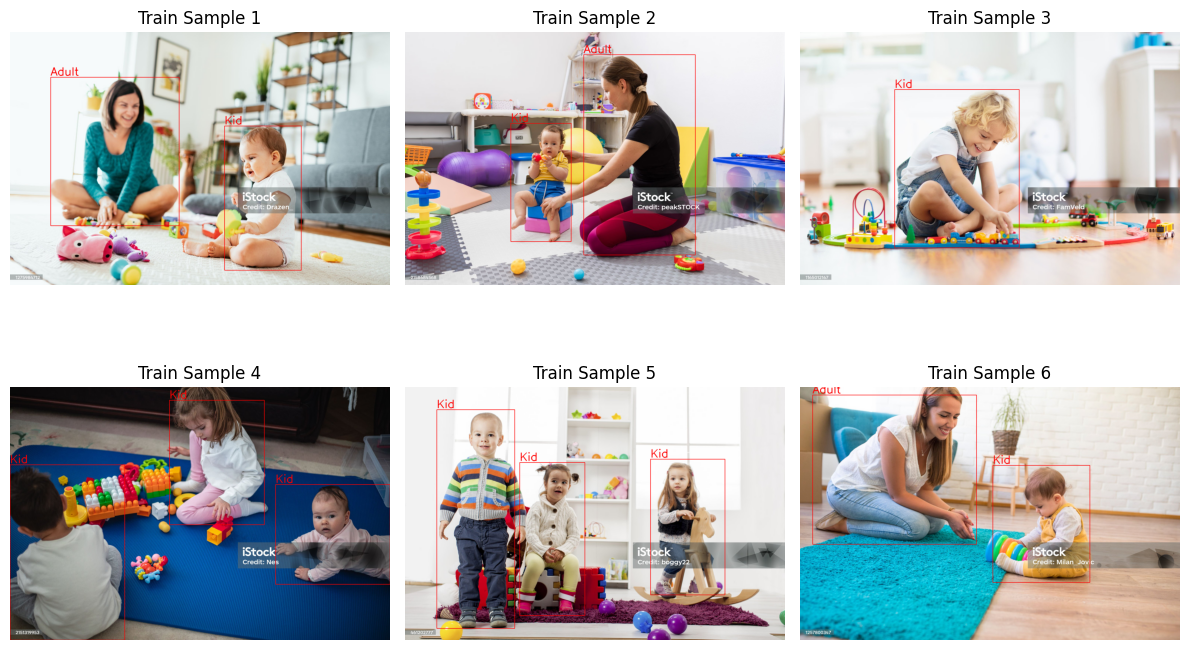

In [5]:
obj.plot_random_samples(split="train",num_samples=6)

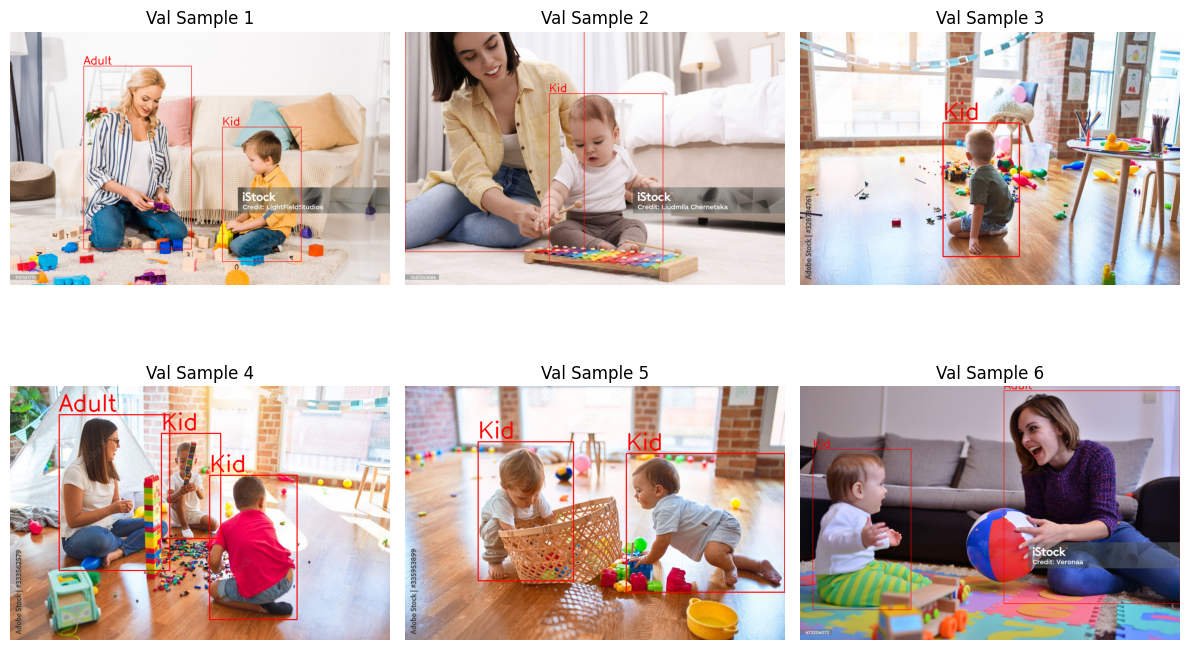

In [6]:
obj.plot_random_samples(split="val",num_samples=6)

UsageError: %%writefile is a cell magic, but the cell body is empty.


In [7]:

file_path = 'children_and_adults/data1.yaml'

with open(file_path, 'r') as file:
    data = yaml.safe_load(file)

print(data)


classes=data["names"]
print("classes Name :",classes)

{'path': '/content/drive/MyDrive/KidzCare/data0', 'train': 'images/train', 'val': 'images/val', 'nc': 2, 'names': {0: 'Kid', 1: 'Adult'}}
classes Name : {0: 'Kid', 1: 'Adult'}


In [8]:
import os, random, shutil

def balance_dataset(split="train"):
    img_dir = f"children_and_adults/images/{split}"
    lbl_dir = f"children_and_adults/labels/{split}"

    out_img_dir = f"children_and_adults_balanced/images/{split}"
    out_lbl_dir = f"children_and_adults_balanced/labels/{split}"
    os.makedirs(out_img_dir, exist_ok=True)
    os.makedirs(out_lbl_dir, exist_ok=True)

    kids, adults = [], []
    for fn in os.listdir(lbl_dir):
        if not fn.endswith(".txt"):
            continue
        img_fn = fn.replace(".txt", ".jpg")  # ganti sesuai format kalau png
        img_path = os.path.join(img_dir, img_fn)

        # skip kalau file image ga ada
        if not os.path.exists(img_path):
            print(f"⚠️ Skip {fn}, tidak ada gambar {img_fn}")
            continue

        with open(os.path.join(lbl_dir, fn)) as f:
            lines = f.read().strip().splitlines()
        if any(line.split()[0] == "0" for line in lines):
            kids.append(fn)
        if any(line.split()[0] == "1" for line in lines):
            adults.append(fn)

    print(f"[{split}] Kids: {len(kids)}, Adults: {len(adults)}")

    # ambil jumlah minimal
    n = min(len(kids), len(adults))
    kids_sampled = random.sample(kids, n)
    adults_sampled = random.sample(adults, n)

    balanced = kids_sampled + adults_sampled
    random.shuffle(balanced)

    for lbl in balanced:
        img_fn = lbl.replace(".txt", ".jpg")
        shutil.copy(os.path.join(img_dir, img_fn), os.path.join(out_img_dir, img_fn))
        shutil.copy(os.path.join(lbl_dir, lbl), os.path.join(out_lbl_dir, lbl))

    print(f"[{split}] Balanced Kids={len(kids_sampled)}, Adults={len(adults_sampled)}")

# jalankan untuk train & val
balance_dataset("train")
balance_dataset("val")

⚠️ Skip Train087.txt, tidak ada gambar Train087.jpg
⚠️ Skip Train100.txt, tidak ada gambar Train100.jpg
⚠️ Skip Train101.txt, tidak ada gambar Train101.jpg
⚠️ Skip Train102.txt, tidak ada gambar Train102.jpg
⚠️ Skip Train103.txt, tidak ada gambar Train103.jpg
⚠️ Skip Train104.txt, tidak ada gambar Train104.jpg
⚠️ Skip Train105.txt, tidak ada gambar Train105.jpg
⚠️ Skip Train106.txt, tidak ada gambar Train106.jpg
⚠️ Skip Train107.txt, tidak ada gambar Train107.jpg
⚠️ Skip Train108.txt, tidak ada gambar Train108.jpg
⚠️ Skip Train109.txt, tidak ada gambar Train109.jpg
⚠️ Skip Train110.txt, tidak ada gambar Train110.jpg
⚠️ Skip Train111.txt, tidak ada gambar Train111.jpg
⚠️ Skip Train415.txt, tidak ada gambar Train415.jpg
[train] Kids: 410, Adults: 286
[train] Balanced Kids=286, Adults=286
⚠️ Skip Val021.txt, tidak ada gambar Val021.jpg
⚠️ Skip Val022.txt, tidak ada gambar Val022.jpg
[val] Kids: 78, Adults: 54
[val] Balanced Kids=54, Adults=54


In [6]:
%%writefile kidsandAdults_yolo_config.yaml
path: ./children_and_adults_balanced
train: images/train
val: images/val

names:
  0: kid
  1: adult

Writing kidsandAdults_yolo_config.yaml


In [2]:
pip install ultralytics

  Using cached ultralytics-8.3.204-py3-none-any.whl.metadata (37 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached torchvision-0.23.0-cp312-cp312-win_amd64.whl.metadata (6.1 kB)
  Using cached ultralytics_thop-2.0.17-py3-none-any.whl.metadata (14 kB)
Using cached ultralytics-8.3.204-py3-none-any.whl (1.1 MB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)
Using cached torchvision-0.23.0-cp312-cp312-win_amd64.whl (1.6 MB)
Using cached ultralytics_thop-2.0.17-py3-none-any.whl (28 kB)

   ---------------------------------------- 0/4 [opencv-python]
   ---------------------------------------- 0/4 [opencv-python]
   ---------------------------------------- 0/4 [opencv-python]
   ---------------------------------------- 0/4 [opencv-python]
   -------------------- ------------------- 2/4 [torchvision]
   -------------------- ------------------- 2/4 [torchvision]
   -------------------- ------------------- 2/4 [torchvision


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# --- Combine UTKFace + aligned_cropped into YOLO format ---

import os, random, shutil

# Paths to your UTKFace datasets (adjust these if folder names differ)
src_dirs = ["UTKFace", "utkface_aligned_cropped"]

# Output base folder
base = "combined_dataset"
img_all = f"{base}/images/all"
lbl_all = f"{base}/labels/all"

os.makedirs(img_all, exist_ok=True)
os.makedirs(lbl_all, exist_ok=True)

# Step 1: Copy and label all images
for src in src_dirs:
    for img in os.listdir(src):
        if not img.lower().endswith(".jpg"):
            continue

        try:
            age = int(img.split("_")[0])
        except:
            continue

        # kid < 13, adult >= 13
        label = 0 if age < 13 else 1

        # copy image
        src_path = os.path.join(src, img)
        dst_img = os.path.join(img_all, img)
        shutil.copy(src_path, dst_img)

        # create YOLO label file (whole image box)
        dst_lbl = os.path.join(lbl_all, img.replace(".jpg", ".txt"))
        with open(dst_lbl, "w") as f:
            f.write(f"{label} 0.5 0.5 1 1\n")

print("✅ Copied and labeled all UTKFace images")

# Step 2: Split into train/val
os.makedirs(f"{base}/images/train", exist_ok=True)
os.makedirs(f"{base}/images/val", exist_ok=True)
os.makedirs(f"{base}/labels/train", exist_ok=True)
os.makedirs(f"{base}/labels/val", exist_ok=True)

all_imgs = [f for f in os.listdir(img_all) if f.lower().endswith(".jpg")]
random.shuffle(all_imgs)

val_split = 0.2
val_count = int(len(all_imgs) * val_split)
val_imgs = all_imgs[:val_count]
train_imgs = all_imgs[val_count:]

def move_files(img_list, split):
    for img in img_list:
        lbl = img.replace(".jpg", ".txt")
        shutil.move(f"{img_all}/{img}", f"{base}/images/{split}/{img}")
        shutil.move(f"{lbl_all}/{lbl}", f"{base}/labels/{split}/{lbl}")

move_files(train_imgs, "train")
move_files(val_imgs, "val")

print(f"✅ Train images: {len(train_imgs)}, Val images: {len(val_imgs)}")

# Step 3: Create YAML file
yaml_content = """train: combined_dataset/images/train
val: combined_dataset/images/val

names:
  0: kid
  1: adult
"""

with open(f"{base}/kidsAdultsCombined.yaml", "w") as f:
    f.write(yaml_content)

print("✅ YAML file created: kidsAdultsCombined.yaml")


✅ Copied and labeled all UTKFace images
✅ Train images: 18967, Val images: 4741
✅ YAML file created: kidsAdultsCombined.yaml


In [7]:
# Retrain model on combined dataset
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # or your previous trained weights
results = model.train(
    data="combined_dataset/kidsAdultsCombined.yaml",
    epochs=25,
    imgsz=640,
    device=0
)


Ultralytics 8.3.213  Python-3.12.4 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=combined_dataset/kidsAdultsCombined.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train12, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100

RuntimeError: Dataset 'combined_dataset/kidsAdultsCombined.yaml' error  Dataset 'combined_dataset/kidsAdultsCombined.yaml' images not found, missing path 'D:\BINUS SEMESTER 5\DL_Projects\DeepLearningAIModel\Combined_dataset\Combined_dataset\images\val'
Note dataset download directory is 'D:\BINUS SEMESTER 5\DL_Projects\DeepLearningAIModel\datasets'. You can update this in 'C:\Users\ASUS\AppData\Roaming\Ultralytics\settings.json'

In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.5.1+cu121
True


In [11]:
from ultralytics import YOLO
import shutil
shutil.copy("runs/detect/train/weights/best.pt", "kdandadult-model.pt")

'kdandadult-model.pt'